<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%08Decision_Tree(Titanic_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 결측치 확인하기
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Embarked 결측치 어떻게 처리할지 보기
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# 결측치 처리
# 결측치 나이값을 평균으로 대체
df['Age'].fillna(df['Age'].mean(), inplace = True)
# Cabin : 객실정보, 객실정보의 결측치를 'N'으로 대체
df['Cabin'].fillna('N', inplace = True)
# Embarked : 승선, 'S'에서 가장 많이 탔기 때문에 'S'로 대체
df['Embarked'].fillna('S', inplace = True)

In [ ]:
# 다시 결측치 확인
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# Cabin의 경우 문자와 숫자가 모두 있기 때문에 통일할 필요가 있음
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
B96 B98          4
G6               4
D                3
              ... 
D48              1
D21              1
E46              1
C87              1
E10              1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
# Cabin의 문자+숫자를, 문자만 남겨놓기로 결정
# 앞 글자만 쓸거니깐 [:1]로 슬라이싱
df['Cabin'] = df['Cabin'].str[:1] 

In [ ]:
# 한 번더 확인
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [ ]:
# 이름의 경우, 너무 많고, 중복되는게 없음
# Dr, Mr, Mrs, Miss만 남겨놓고 이름 삭제
# 정규표현식을 써서 제거한다.
# ' ([A-Za-z]+)\.' : 뛰어쓰기로 시작되며, 모든 알파벳을 포함한 문자가 반복되다가 dot(.)으로 마무리 되는 문자열
df['Name'].value_counts()
name = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
name

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
name.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Ms            1
Mme           1
Sir           1
Name: Name, dtype: int64

In [ ]:
# 많은 상위 5개의 호칭만 가져간다.
title = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']
df['Title'] = [i if i in title else 'Other' for i in name]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr


In [ ]:
# 필요 없다고 생각하는 정보 삭제
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,N,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,N,S,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs
4,0,3,male,35.0,0,0,8.0500,N,S,Mr


In [ ]:
# 숫자형 카테고리로 변환
# 문자형 -> 숫자형
from sklearn.preprocessing import LabelEncoder

enc = {}

for feat in ['Cabin', 'Sex', 'Title', 'Embarked']:
  enc[feat] = LabelEncoder()
  df[feat] = enc[feat].fit_transform(df[feat])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,7,2,3
1,1,1,0,38.0,1,0,71.2833,2,0,4
2,1,3,0,26.0,0,0,7.9250,7,2,2
3,1,1,0,35.0,1,0,53.1000,2,2,4
4,0,3,1,35.0,0,0,8.0500,7,2,3


In [ ]:
# 학습데이터 만들기
from sklearn.model_selection import train_test_split

target = df['Survived']
feature = df.drop('Survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

trainGini = []
testGini = []
trainEntropy = []
testEntropy = []
depth = []

for k in range(1, 101):
  # Gini 계수를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
  dt.fit(x_train, y_train)

  # 정확도를 측정한다.
  trainGini.append(dt.score(x_train, y_train))
  testGini.append(dt.score(x_test, y_test))

  # Entropy를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
  dt.fit(x_train, y_train)
  trainEntropy.append(dt.score(x_train, y_train))
  testEntropy.append(dt.score(x_test, y_test))

  # depth를 변화시켜가면서 test의 정확도를 측정한다.
  depth.append(k)
  # print('depth = %d done.' % k)

In [ ]:
import numpy as np

# 정확도가 가장 큰 최적 depth를 찾는다.
nDepth = depth[np.argmax(testGini)]
print("정확도가 가장 큰 depth :", nDepth)

정확도가 가장 큰 depth : 7


In [ ]:
from sklearn.metrics import accuracy_score

# opt_alpha를 적용한 tree를 사용한다.
dt = DecisionTreeClassifier(max_depth = nDepth)
dt.fit(x_train, y_train)

print('시험 데이터의 정확도 = %.4f' % dt.score(x_test, y_test))
print('최적 트리의 depth = %d' % nDepth)

시험 데이터의 정확도 = 0.8492
최적 트리의 depth = 7


In [ ]:
# feature별 중요도를 파악한다.
feat_impo = dt.feature_importances_
feat_name = feature.columns

print(feat_impo)
print(feat_name)

[0.12897668 0.42823267 0.06332843 0.05919624 0.01128347 0.21118883
 0.01567017 0.0144146  0.06770892]
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Title'],
      dtype='object')


In [ ]:
# 중요도가 높은 feature 5개를 확인한다.
idx = np.argsort(feat_impo)[::-1][:5]
np.array(feat_name)[idx]

array(['Sex', 'Fare', 'Pclass', 'Title', 'Age'], dtype=object)

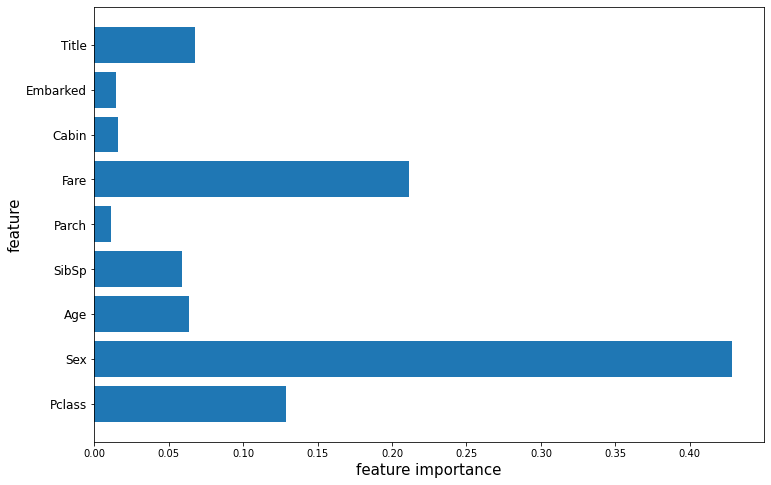

In [ ]:
import matplotlib.pyplot as plt

# feature들의 중요도를 시각화하기. 
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

plt.figure(figsize=(12, 8))

plt.barh(idx, feat_impo, align='center') 
plt.yticks(idx, feat_name, size=12) 
plt.xlabel('feature importance', size=15) 
plt.ylabel('feature', size=15)
plt.show()
